In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import linalg as LA
from random import *
import math

In [2]:
# read file and store
returns = pd.read_csv("DailyReturn.csv")

In [3]:
returns.drop(returns.columns[0], axis=1, inplace= True)
means = returns.mean()
size = len(returns.columns)

In [4]:
returns.cov().to_csv('regular_cov.csv', index=False)
returns.corr().to_csv('regular_corr.csv', index=False)

In [5]:
seed(1)

In [6]:
def cov(weights, i, j):
    mean_i = means[i]
    mean_j = means[j]
    col_i = returns.iloc[:,i]
    col_j = returns.iloc[:,j]
    cov_list = weights * (col_i - mean_i)* (col_j - mean_j)
    return sum(cov_list)

In [7]:
def eigengraph(λ):
    weights = [(1-λ)*λ**(i-1) for i in range(1, len(returns.index)+1) ]
    weights = [weight/sum(weights) for weight in weights]
    cov_matrix = [ [ cov(weights, i, j) for i in range(size) ] for j in range(size) ]
    e_value, e_vector = LA.eig(np.array(cov_matrix))
    e_value.sort()
    e_value = e_value[::-1]
    cumulative_var = np.array([sum(e_value[:i])/sum(e_value) for i in range(1, len(e_value) + 1)],dtype = "complex_")
    plt.plot([i for i in range(len(e_value))],cumulative_var)
    plt.title('λ = ' + str(λ) + ' cumulative eigenvalue graph')
    plt.ylabel('cumulative variance')
    plt.xlabel('K value')
    plt.show()
    return cov_matrix

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


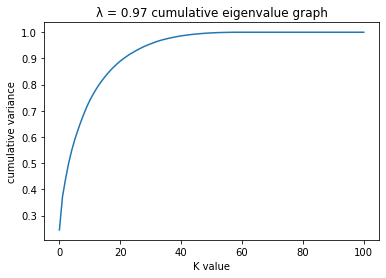

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


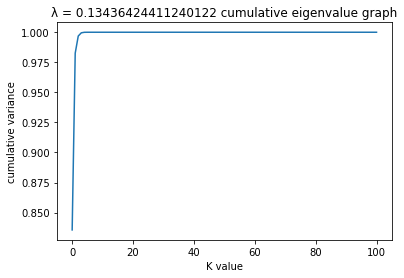

/opt/anaconda3/lib/python3.9/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


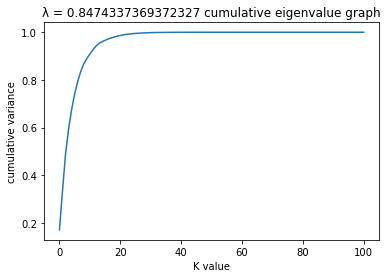

In [8]:
# Q1.a
c1 = pd.DataFrame(eigengraph(0.97), columns = returns.columns, index = returns.columns)
c1.to_csv("97_cov.csv",index=False)
c1 
# Q1.b
for i in range(2):
    λ = random()
    c2 = eigengraph(λ)

In [9]:
corr_matrix = [[0 for i in range(len(c1))] for j in range(len(c1))]
for i in range(len(c1)):
    for j in range(i, len(c1)):
        if i == j:
            corr_matrix[i][j] = 1.0
            continue
        cov = c1.iloc[i][j]
        stdi = math.sqrt(c1.iloc[i][i])
        stdj = math.sqrt(c1.iloc[j][j])
        corr_matrix[i][j] = cov/stdi/stdj
        corr_matrix[j][i] = corr_matrix[i][j]
corr_matrix = pd.DataFrame(corr_matrix, columns = returns.columns, index = returns.columns)
corr_matrix.to_csv("97_corr.csv", index=False)